# Land Cover Change Analysis of Lower Vancouver Island Using Classification And Regression Tree (CART) Algorithm in Google Earth Engine with Python

## Abstract

This study uses Google Earth Engine API in Python to perform a land cover change analysis of Lower Vancouver Island using Classification And Regression Tree (CART) algorithm from 2013 to 2022. A pixel-based classification is done to classify the land cover of Lower Vancouver Island. The goal of this study is to identify the change in land cover over a period of time and understand the factors responsible for the change.

The methodology involves preprocessing of satellite imagery using the Google Earth Engine API, followed by applying the CART algorithm to perform pixel-based classification. The accuracy of the classification is evaluated using confusion matrix, and the overall accuracy is found to be satisfactory. The classified images are used to identify the changes in land cover over time, and the factors responsible for the change are analyzed.

The results of the study provide insights into the land cover change patterns and help in understanding the factors driving the change. The study demonstrates the potential of using Google Earth Engine API in Python and the CART algorithm for land cover change analysis, which can be applied to other regions as well.

## Significance of the Study

1. This study can provide valuable insights to businesses that rely on natural resources. By understanding the factors driving land cover change, businesses can make informed decisions about their operations and minimize their impact on the environment.

2. The methodology used in this study can be applied to other regions, allowing businesses to conduct land cover change analysis for areas where they operate. This can help businesses identify potential risks and opportunities and develop strategies to manage their operations more sustainably.

3. The results of the study can be used by businesses to inform their sustainability reporting and demonstrate their commitment to environmental stewardship. This can improve the reputation of the business and help them build stronger relationships with their stakeholders.

## Introduction

Land cover change is a critical aspect of global environmental change, and understanding its patterns and drivers is essential for sustainable land management. Lower Vancouver Island, located on the southwest coast of British Columbia, Canada, has experienced significant land cover change in recent years due to urbanization, forestry, and agriculture. This study aims to use the Google Earth Engine API in Python and the Classification And Regression Tree (CART) algorithm to perform a land cover change analysis of Lower Vancouver Island. By identifying the changes in land cover over time and the factors driving the change, this study can contribute to the sustainable management of natural resources in the region.



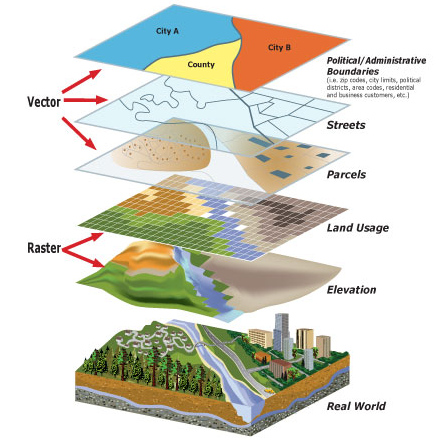

Source: https://edx.netl.doe.gov/group/spatial-data-resources

Google Earth Engine API is a powerful tool for analyzing and visualizing geospatial data, including satellite imagery. The CART algorithm is a widely used machine learning method that can be applied to land cover classification, making it an excellent choice for analyzing land cover change. The methodology used in this study involves preprocessing of satellite imagery using the Google Earth Engine API, followed by applying the CART algorithm to perform pixel-based classification. The accuracy of the classification is evaluated using a confusion matrix, and the classified images are used to identify the changes in land cover over time.

CART is a predictive algorithm used in Machine learning and it explains how the target variable’s values can be predicted based on other matters. It is a decision tree where each fork is split into a predictor variable and each node has a prediction for the target variable at the end.

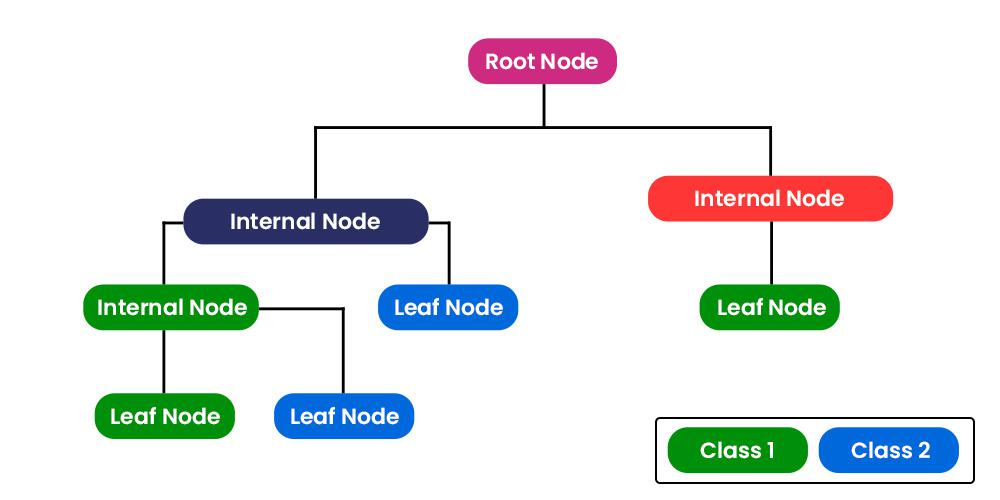

In the decision tree, nodes are split into sub-nodes on the basis of a threshold value of an attribute. The root node is taken as the training set and is split into two by considering the best attribute and threshold value. Further, the subsets are also split using the same logic. This continues till the last pure sub-set is found in the tree or the maximum number of leaves possible in that growing tree.

The CART algorithm works via the following process:
* The best split point of each input is obtained. 
* Based on the best split points of each input in Step 1, the new “best” split point is identified. 
* Split the chosen input according to the “best” split point. 
* Continue splitting until a stopping rule is satisfied or no further desirable splitting is available.

The study of land cover change is crucial for businesses that rely on natural resources for their operations, such as forestry, mining, and agriculture. By understanding the drivers of land cover change, businesses can develop strategies to manage their operations more sustainably and minimize their impact on the environment. This study can provide valuable insights to businesses operating in Lower Vancouver Island and other regions by identifying the factors driving land cover change and the patterns of change over time. By applying the methodology used in this study, businesses can conduct their own land cover change analysis and make informed decisions about their operations.

## Code

### Initialization

In [1]:
import subprocess

try:
    import geehydro
except ImportError:
    print('geehydro package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geehydro'])

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

geehydro package not installed. Installing ...
geemap package not installed. Installing ...


Subprocess module which allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes.

The next four lines are part of a try block, which attempts to import the geehydro module. If the geehydro module is already installed, the code will simply continue executing after the try block. However, if the geehydro module is not installed, an ImportError will be raised.

If the geehydro module is not installed, the code will execute the except block. The except block will print a message indicating that the geehydro package is not installed, and will then use the subprocess.check_call method to run a command to install the geehydro package. Specifically, this line of code will execute the pip command with the argument install geehydro to install the package.

Then it does the same with geemap library.

In [40]:
import os
import ee
import folium
import geehydro
import geemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**NOTE**

**To reproduce this project, an account in Google Earth Engine is required so you could generate a token that is necessary to run the Google Earth Engine API. Sign up link below:**

http://signup.earthengine.google.com/

In [3]:
try:
    ee.Initialize()
except Exception as e:
  ee.Authenticate()
  ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=FXYqYFqgyyKR0YtuNUmvGBlAiJLxi5lUirdVxk5OwyA&tc=cMsvv1YTx2I14I-RGlkHd61T4eSlAexQXi3b3vzQPQI&cc=FZEbZtz47YyIcYkj3O_ynIzTngj-ElUQs-W9eoBew2U

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVHEtk7LjJC9NqPe-xryKydtpKjslax1vyRlUDgd3lVa8l44rZ4PAAZckj4

Successfully saved authorization token.


In [8]:
# Initialize Folium Map

Map_2020 = folium.Map(location=[48.5, -123.6], zoom_start=11)
Map_2020.setOptions('HYBRID')
Map_2020

The code initializes a folium Map object with a center location at around northern Greater Victoria, [48.5, -123.6] and a zoom level of 11. The folium library is a Python wrapper for creating Leaflet.js maps, which can be used to visualize geospatial data.

The first line of code creates a folium Map object called Map_2020. The location argument specifies the center coordinates of the map, which are latitude 48.5 and longitude -123.6. The zoom_start argument specifies the initial zoom level of the map, which is 11 in this case.

The second line of code sets the map type to 'HYBRID'. The setOptions() method is used to modify the map options of the folium Map object. In this case, it is used to set the map type to 'HYBRID', which is a hybrid map type that combines satellite imagery with road maps and labels.

### Process Flowchart

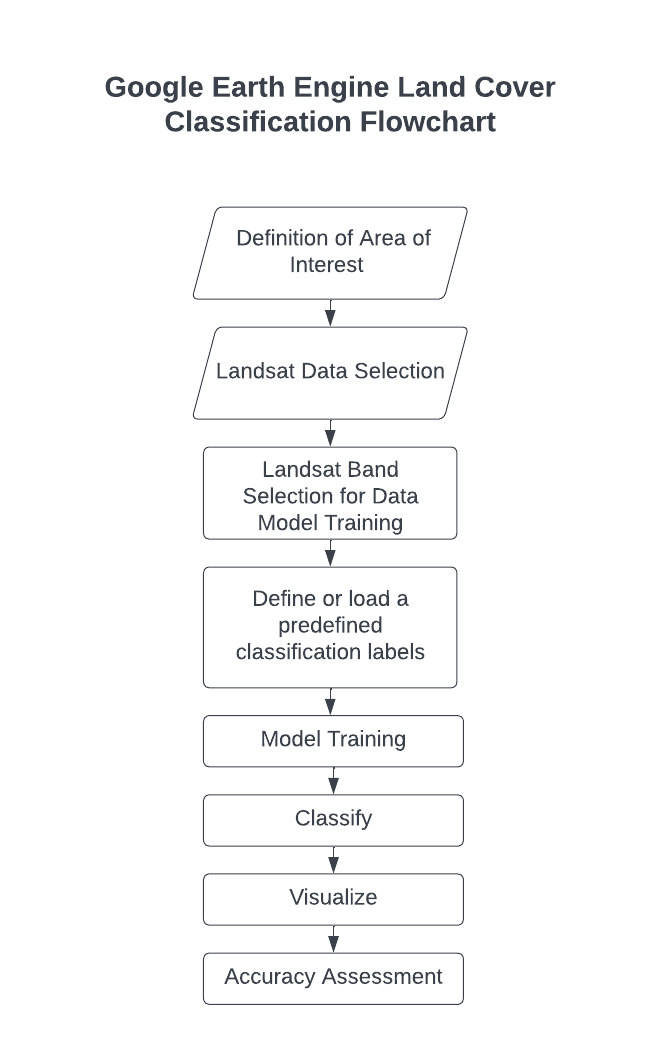

## Classification

### 2013 Land Cover Map

#### Initialization

In [5]:
# Initializing the folium map
Map_2013 = folium.Map(location=[48.5, -123.6], zoom_start=11)
Map_2013.setOptions('HYBRID')

#### Area of Interest

In [7]:
# Defining our area of interest

area = ee.Geometry.Polygon(
    [[[-123.9481117, 48.7245919], [-123.9439919, 48.2915186], [-123.2545998, 48.2896912], [-123.2583763, 48.7270832],[-123.9481117, 48.7245919]]], None, False
)

The cell block defines a polygon geometry object in Google Earth Engine (GEE) using the ee.Geometry.Polygon() function. The polygon is defined by a list of coordinates in the format of [[[lon1, lat1], [lon2, lat2], ..., [lonN, latN]], null, boolean].

In this case, the polygon has five coordinates that represent a closed shape that encompasses an area of interest in Lower Vancouver Island. The first and last coordinates are the same, defining a closed loop. The None and False parameters indicate that there is no particular region code or need for the edges to be geodesic.

We will use this polygon geometry object to filter our data and clipping our map to our region of interest.

#### Retrieving of Landsat Data

In [9]:
# Retrieving our Landsat 8 data
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1')

image = ee.Algorithms.Landsat.simpleComposite(**{
  'collection': l8.filterDate('2013-05-01', '2013-12-31'),
  'asFloat': True
})

This cell uses the Earth Engine API to create a cloud-free composite image from Landsat 8 satellite imagery acquired during a specified time period.

The first line of code creates an ImageCollection object called 'l8' containing all Landsat 8 Tier 1 Level 1 (Surface Reflectance) imagery available in Earth Engine. The Tier 1 Level 1 data product provides atmospherically corrected reflectance values and cloud masks.

The second line of code creates a single composite image from the Landsat 8 imagery within a specified time range. The ee.Algorithms.Landsat.simpleComposite() function is used to create the composite image. The function takes in a dictionary of arguments, where the 'collection' argument specifies the input Landsat 8 imagery to use for creating the composite. In this case, the filterDate() method is used to select all imagery from May 1, 2013 to December 31, 2013. The 'asFloat' argument is set to True to ensure that the output pixel values are floating point numbers, rather than integers.

#### Feature Selection

In [10]:
# Selecting bands for classification
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11']

This line of code selects the bands from the Landsat 8 imagery that will be used for classification.

The Landsat 8 imagery contains several bands representing different regions of the electromagnetic spectrum, including visible, near-infrared, shortwave infrared, and thermal infrared bands. The specific bands selected for classification will depend on the research question and the classification algorithm being used.

In this case, the code selects a total of eight bands for classification using a CART algorithm. The selected bands are represented by the abbreviations 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', and 'B11', which correspond to specific regions of the electromagnetic spectrum measured by the Landsat 8 sensor.

The selected bands likely represent combinations of visible, near-infrared, and shortwave infrared spectral regions, which are commonly used for land cover classification due to their sensitivity to vegetation, water, and urban features.

Additionally, the thermal infrared bands (B10 and B11) may be useful for identifying temperature differences in the landscape, which can be indicative of certain land cover types (e.g. water bodies or urban areas).

#### Training

In [11]:
# Load training points. The numeric property 'class' stores known labels.
points = ee.FeatureCollection('GOOGLE/EE/DEMOS/demo_landcover_labels')

This cell  loads a set of training points for the classification algorithm, which have known labels or categories assigned to them. The training points are stored as a FeatureCollection object in Earth Engine.

The training points used in this code come from the 'demo_landcover_labels' dataset provided by Google in Earth Engine. The dataset contains a set of sample points across a region of interest, each with a known land cover label or category assigned to them.

The training points are used to train a classification algorithm, such as the CART algorithm used in this code. The algorithm uses the spectral values of the input Landsat 8 imagery at the training points, along with their known land cover labels, to develop a model for classifying the entire study area.

In [12]:
# This property of the table stores the land cover labels.
label = 'landcover'

# Overlay the points on the imagery to get training.
training = image.select(bands).sampleRegions(**{
  'collection': points,
  'properties': [label],
  'scale': 30
})

This cell performs the operation of overlaying the training points on the Landsat 8 imagery and extracting the spectral information at each point location. The extracted information is then used to train a classification algorithm to classify the study area.

The first line of code assigns the variable name "label" to a string that represents the column in the training data that contains the land cover labels for each training point.

The second block of code creates a "training" dataset by overlaying the "points" (training points with known labels) on the Landsat 8 image using the "sampleRegions()" function in Earth Engine. The "select()" method is used to choose the specific spectral bands from the Landsat 8 imagery that will be used for classification, which are defined earlier in the code.

The "sampleRegions()" function extracts the spectral values of each selected band at the location of each training point and creates a new dataset with these values and the associated land cover label assigned to each point. The resulting "training" dataset is a table containing the spectral information and land cover labels for each training point.

The "properties" parameter in the "sampleRegions()" function specifies the name of the column in the "points" dataset that contains the land cover labels for each point. The "scale" parameter specifies the pixel resolution of the imagery, which in this case is set to 30 meters. The resulting "training" dataset can then be used to train a classification algorithm to map the land cover across the study area.

In [13]:
# Train a CART classifier with default parameters.
trained = ee.Classifier.smileCart().train(training, label, bands)

This code trains a classification algorithm, specifically a Classification and Regression Tree (CART) algorithm, using the training dataset that was created in the previous step.

The first line of the code calls the "smileCart()" function of the Earth Engine's "Classifier" module. This function creates a CART classification algorithm.

The "train()" method is then called on the CART object with the following parameters:

1. "training": The training dataset that was created in the previous step, containing the spectral information and land cover labels for each training point.

2. "label": The name of the column in the training dataset that contains the land cover labels for each training point.

3. "bands": The list of spectral bands that will be used to train the algorithm.

The "train()" method trains the CART algorithm on the input training data by fitting a decision tree to the training data. The algorithm uses the spectral information and known land cover labels in the training data to learn the relationship between spectral information and land cover types.

The resulting "trained" CART classifier can then be applied to the Landsat 8 imagery to classify land cover types over the study area.

#### Classification

In [22]:
# Classify the image with the same bands used for training.
classified = image.select(bands).classify(trained)
aoi_2013 = classified.clip(area)

This code block classifies the Landsat 8 imagery using the trained CART algorithm, and visualizes the classification results on a map.

The first line selects the spectral bands of the Landsat 8 imagery that were used for training the CART algorithm. The "classify()" method is then called on the selected bands, using the "trained" CART object as input. This generates a land cover classification map for the study area.

The next line clips the classification map to the extent of the "Canada" feature collection, which was created earlier. This ensures that the classification results are only shown for the study area.

#### Visualization

In [23]:
# Display the inputs and the results.
Map_2013.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'max': 0.4}, 'image')
Map_2013.addLayer(aoi_2013,
             {'min': 0, 'max': 2, 'palette': ['red', 'green', 'blue']},
             'classification')

This add the Landsat 8 imagery and the land cover classification map to a map object called "Map_2013", using the "addLayer()" method. The Landsat 8 imagery is displayed in true color (bands 4, 3, and 2), while the land cover classification map is displayed using a color palette with red for "urban", green for "vegetation", and blue for "water". The "min" and "max" parameters are used to set the range of values for the classification map, while the "palette" parameter sets the colors to be used for each land cover type.

In [24]:
Map_2013

In [25]:
# Getting Descriptive Statistics for the classified image
landsat_stats = geemap.image_stats(aoi_2013, scale=90)
landsat_stats.getInfo()

{'max': {'classification': 2},
 'mean': {'classification': 1.3266631352620797},
 'min': {'classification': 0},
 'std': {'classification': 0.5129753063875938},
 'sum': {'classification': 609134.9333333265}}

Here, we use the geemap library to obtain descriptive statistics for the classified image. The image_stats() function computes the minimum, maximum, mean, standard deviation, and pixel count for each band in the given image. In this case, aoi is the classified image obtained from the CART algorithm applied on the Landsat image. The scale parameter specifies the spatial resolution for which to compute the statistics.

The output of the image_stats() function is a dictionary containing the computed statistics for each band in the image. The getInfo() function is used to retrieve the dictionary as a JSON-like object, which can be printed or saved to a file. The statistics can be used to understand the distribution of land cover classes in the study area, and to compare changes in land cover over time or across different regions.

In [26]:
landsat_props = geemap.image_props(aoi_2013)
landsat_props.getInfo()

{'NOMINAL_SCALE': 111319.49079327357, 'system:band_names': ['classification']}

The code landsat_props = geemap.image_props(aoi) computes a dictionary of image properties for the input image aoi, which is the classified image for Lower Vancouver Island generated in the previous steps. The properties include basic information about the image such as the number of bands, dimensions, and data type, as well as statistics for each band including minimum, maximum, mean, and standard deviation.

The geemap.image_props() function is provided by the geemap library, which is a Python package built on top of Google Earth Engine (GEE) and designed to simplify the use of GEE with Jupyter notebooks. The function allows users to easily compute image properties for GEE images and returns a dictionary of properties that can be used for further analysis and visualization.

In this case, the computed properties can be used to gain insights into the characteristics of the classified image and its suitability for different types of analysis. For example, the statistics for each band can be used to assess the variability of different land cover classes across the study area, which can help in identifying areas of interest for further investigation or management.

### 2022 Land Cover Map

We will be doing the same workflow but this time we will change the date of capture to 2022.

In [30]:
#Initializing folium map
Map_2022 = folium.Map(location=[48.5, -123.6], zoom_start=11)
Map_2022.setOptions('HYBRID')

In [31]:
# Retrieving a cloud-free input imagery from Landsat 8 datasets.
image = ee.Algorithms.Landsat.simpleComposite(**{
  'collection': l8.filterDate('2020-01-01', '2020-12-31'),
  'asFloat': True
})

# Use these bands for prediction.
bands = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B10', 'B11']

# Load training points. The numeric property 'class' stores known labels.
points = ee.FeatureCollection('GOOGLE/EE/DEMOS/demo_landcover_labels')

# This property of the table stores the land cover labels.
label = 'landcover'

# Overlay the points on the imagery to get training.
training = image.select(bands).sampleRegions(**{
  'collection': points,
  'properties': [label],
  'scale': 30
})

# Train a CART classifier with default parameters.
trained = ee.Classifier.smileCart().train(training, label, bands)

# Classify the image with the same bands used for training.
classified = image.select(bands).classify(trained)
aoi_2022 = classified.clip(area)

# Display the inputs and the results.
Map_2022.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'max': 0.4}, 'image')
Map_2022.addLayer(aoi_2022,
             {'min': 0, 'max': 2, 'palette': ['red', 'green', 'blue']},
             'classification')

In [32]:
Map_2022

## Image Analysis

### 2013 Data

#### Initialization

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
!pip install easydev                 #version 0.12.0
!pip install colormap                #version 1.0.4
!pip install opencv-python           #version 4.5.5.64
!pip install colorgram.py            #version 1.2.0
!pip install extcolors               #version 1.0.0

In [35]:
import cv2
import extcolors

from colormap import rgb2hex

#### Image Data Extraction

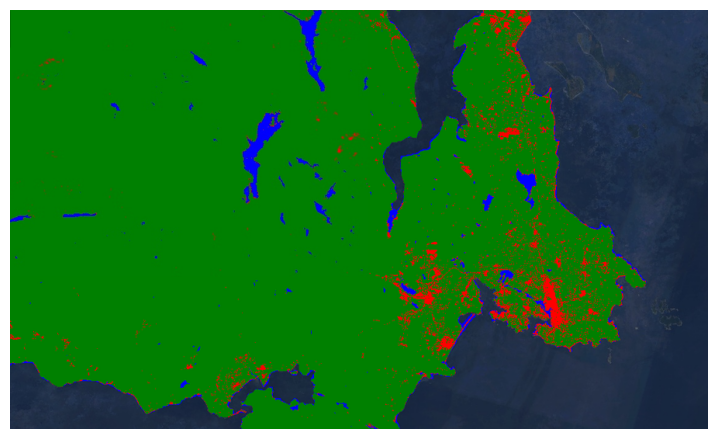

In [59]:
#Displaying the Image

input_name = 'Map2013.PNG'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [60]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((0, 128, 1), 307815),
  ((24, 40, 65), 144942),
  ((52, 102, 0), 4454),
  ((0, 0, 255), 4266),
  ((255, 0, 0), 4175),
  ((114, 71, 0), 2405),
  ((80, 88, 0), 2212),
  ((213, 21, 0), 1822),
  ((155, 50, 0), 1548),
  ((132, 62, 0), 1453),
  ((0, 9, 212), 1303),
  ((57, 70, 91), 1080)],
 486900)

In [70]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#008001,307815
1,#182841,144942
2,#346600,4454
3,#0000FF,4266
4,#FF0000,4175
5,#724700,2405
6,#505800,2212
7,#D51500,1822
8,#9B3200,1548
9,#843E00,1453


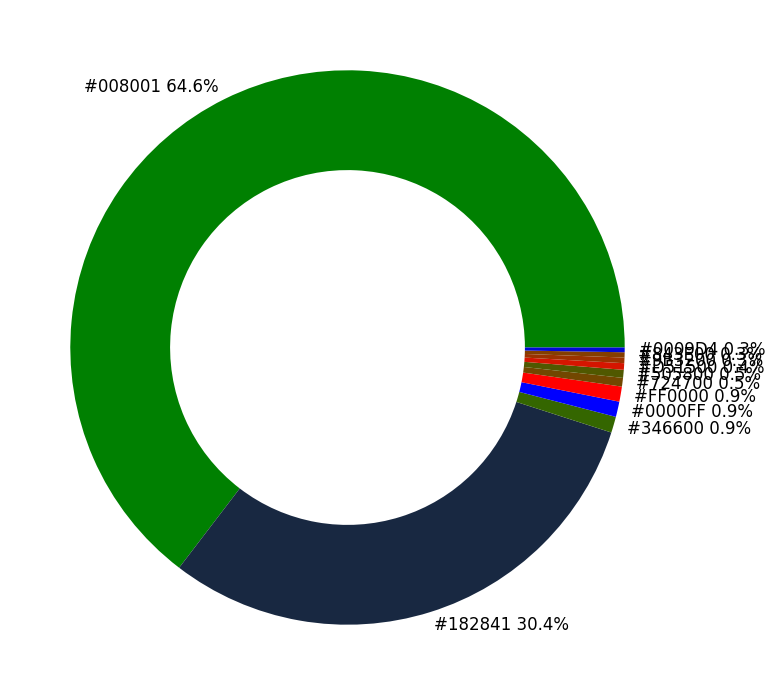

In [71]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

#### Data Cleaning

In [72]:
# Dropping the sea/ocean coverage

df_color = df_color.drop(index=1)
df_color

,c_code,occurence
0,#008001,307815
2,#346600,4454
3,#0000FF,4266
4,#FF0000,4175
5,#724700,2405
6,#505800,2212
7,#D51500,1822
8,#9B3200,1548
9,#843E00,1453
10,#0009D4,1303


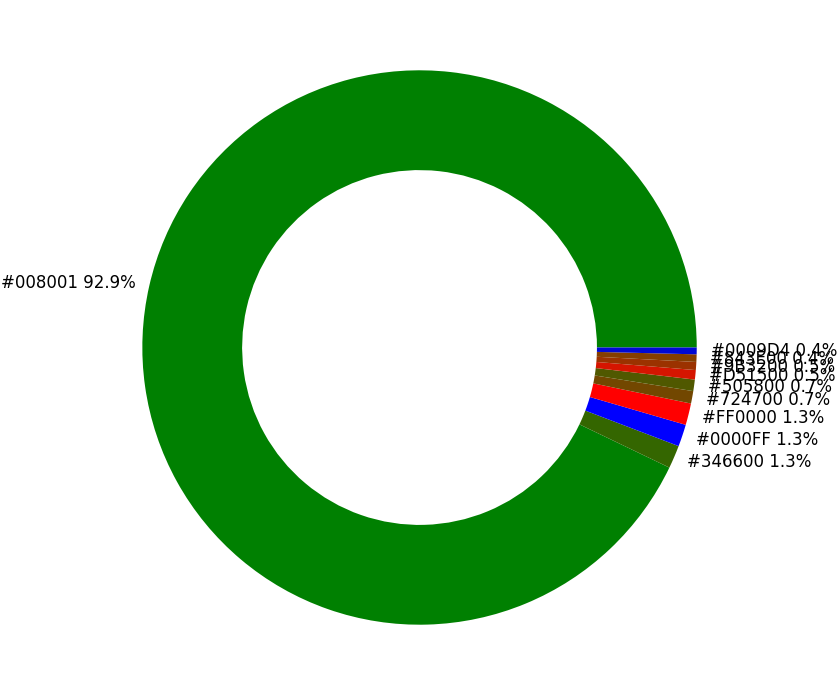

In [73]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

In [74]:
# Dropping the Green Coverage to see more details

df_color = df_color.drop(index=0)
df_color

,c_code,occurence
2,#346600,4454
3,#0000FF,4266
4,#FF0000,4175
5,#724700,2405
6,#505800,2212
7,#D51500,1822
8,#9B3200,1548
9,#843E00,1453
10,#0009D4,1303


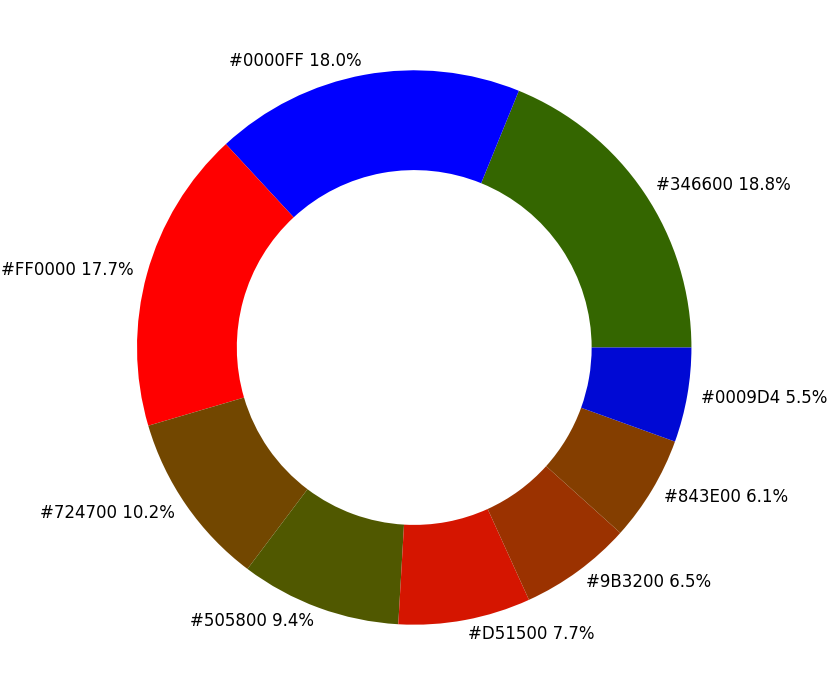

In [75]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

Legend:

'#008001': 'Evergreen Forest', </br>
                       '#182841': 'Sea/Ocean', </br>
                       '#346600': 'Deciduous Forest', </br>
                       '#0000FF': 'Mixed Forest', </br>
                       '#FF0000': 'Developed Area (Medium Intensity)', </br>
                       '#724700': 'Cultivated Crops', </br>
                       '#505800': 'Shrubs', </br>
                       '#D51500': 'Developed Area (High Intensity)', </br>
                       '#9B3200': 'Lands', </br>
                       '#843E00': 'Farmlands', </br>
                       '#0009D4': 'Coastal / Fresh Water'

### 2022 Data

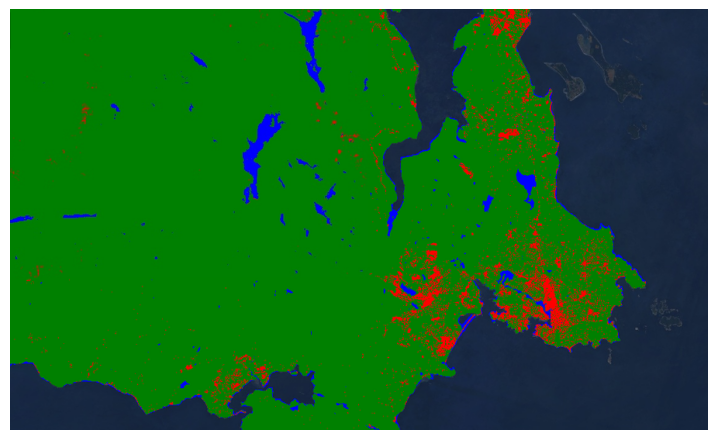

In [77]:
input_name = 'Map2020.PNG'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [78]:
colors_y = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_y

([((0, 128, 1), 305442),
  ((23, 39, 64), 145937),
  ((255, 0, 0), 4718),
  ((0, 0, 255), 4583),
  ((36, 110, 0), 3872),
  ((133, 61, 0), 2775),
  ((102, 77, 0), 2715),
  ((62, 97, 0), 2320),
  ((177, 39, 0), 1822),
  ((151, 52, 0), 1458),
  ((209, 23, 0), 1270),
  ((0, 30, 195), 1247)],
 488700)

In [79]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_y)
df_color

,c_code,occurence
0,#008001,305442
1,#172740,145937
2,#FF0000,4718
3,#0000FF,4583
4,#246E00,3872
5,#853D00,2775
6,#664D00,2715
7,#3E6100,2320
8,#B12700,1822
9,#973400,1458


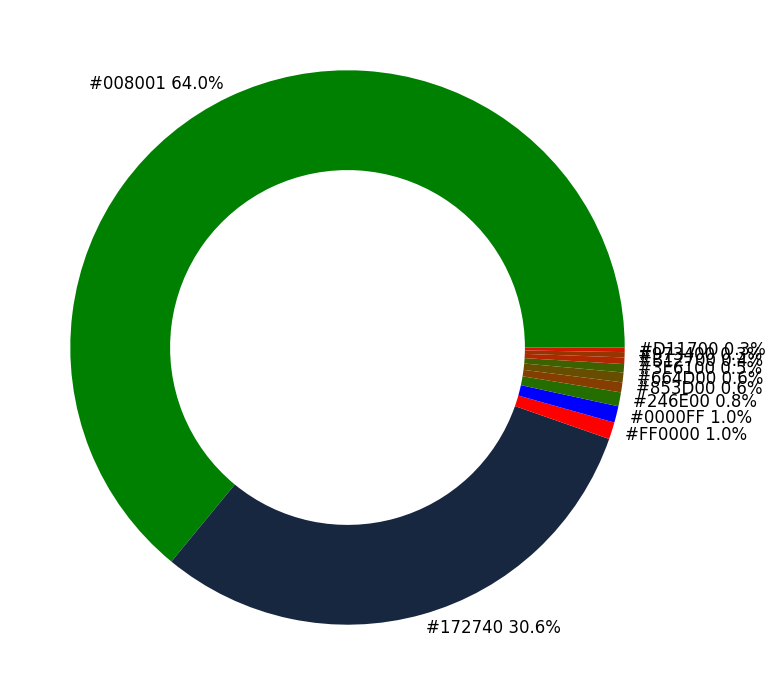

In [80]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

#### Data Cleaning

In [81]:
# Dropping the sea/ocean coverage

df_color = df_color.drop(index=1)
df_color

,c_code,occurence
0,#008001,305442
2,#FF0000,4718
3,#0000FF,4583
4,#246E00,3872
5,#853D00,2775
6,#664D00,2715
7,#3E6100,2320
8,#B12700,1822
9,#973400,1458
10,#D11700,1270


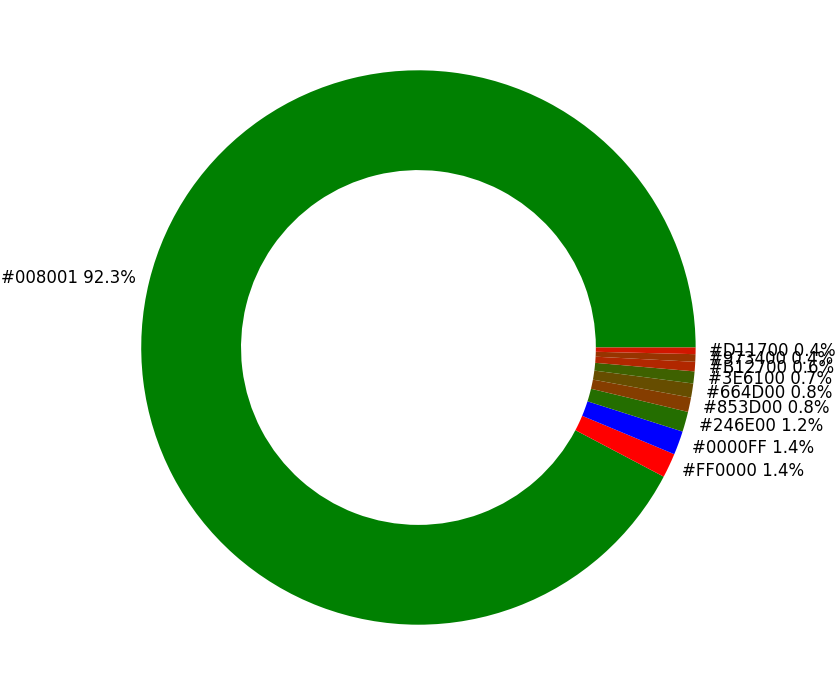

In [82]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

In [83]:
# Dropping Forest Coverage

# Dropping the Green Coverage to see more details

df_color = df_color.drop(index=0)
df_color

,c_code,occurence
2,#FF0000,4718
3,#0000FF,4583
4,#246E00,3872
5,#853D00,2775
6,#664D00,2715
7,#3E6100,2320
8,#B12700,1822
9,#973400,1458
10,#D11700,1270


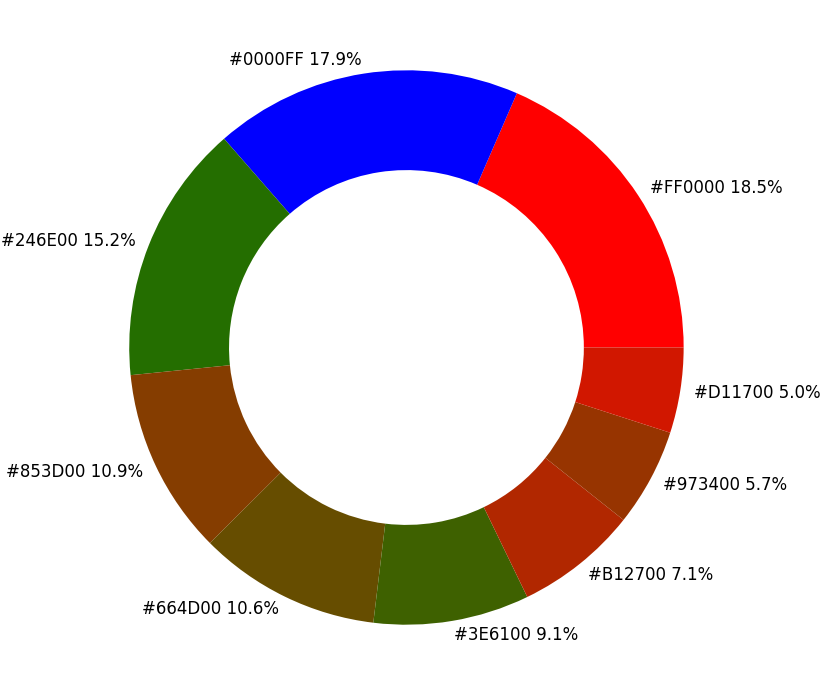

In [84]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

Legend:

'#008001': 'Evergreen Forest', </br>
                       '#182841': 'Sea/Ocean', </br>
                       '#346600': 'Deciduous Forest', </br>
                       '#0000FF': 'Mixed Forest', </br>
                       '#FF0000': 'Developed Area (Medium Intensity)', </br>
                       '#724700': 'Cultivated Crops', </br>
                       '#505800': 'Shrubs', </br>
                       '#D51500': 'Developed Area (High Intensity)', </br>
                       '#9B3200': 'Lands', </br>
                       '#843E00': 'Farmlands', </br>
                       '#0009D4': 'Coastal / Fresh Water'

## Conclusion

Comparing the two datasets, we can see that there have been some significant changes in the land cover over the nine-year period from 2013 to 2022.

The most noticeable change is the reduction in the area covered by evergreen forest, which has decreased by around 1.5% (from 307,815 to 305,442 occurrences). This could be due to deforestation, natural disasters, or other factors such as land-use changes.

On the other hand, we can see an increase in the area covered by sea/ocean (represented by the color '#172740'), which has increased from 144,942 to 145,937 occurrences, indicating a potential shift towards coastal development or other sea-based activities.

Another interesting change is the increase in the occurrence of the color '#FF0000' (Developed Area (Medium Intensity)), which has increased from 4,175 to 4,718 occurrences. This could be due to urbanization or other forms of human settlement.

These changes suggest a complex interplay of human and natural factors affecting land cover in the area over the past decade. Further analysis could be carried out to identify the specific drivers of these changes and inform land-use policies and conservation efforts.